<a href="https://colab.research.google.com/github/SaraKarim23/Artificial-Intelligence-LAB_CSE-3636-Spring-2025/blob/main/Greedy_Hill_Climbing_Algorithm_for_the_8_Queens_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **📌 What is the 8-Queens Problem?** <br>
The 8-Queens Problem means placing 8 queens on a chessboard (8×8) so that no two queens attack each other.
Queens can attack if they are in the same row, column, or diagonal.
## **📌 What is Hill Climbing? <br>**
Hill Climbing is a simple way for a computer to find the best solution step by step.
It starts with a random board and makes small changes to reduce the number of attacking queens.
The goal is to reach a board where no queens attack each other. <br>

Starting Board: [3, 2, 3, 0, 0, 1, 7, 7] (10 Attacks)
Moving to: [3, 6, 3, 0, 0, 1, 7, 7] (6 Attacks)
Moving to: [2, 6, 3, 0, 0, 1, 7, 7] (4 Attacks)
Moving to: [2, 6, 3, 0, 0, 1, 4, 7] (2 Attacks)
Moving to: [2, 6, 3, 0, 5, 1, 4, 7] (1 Attacks)
Solution Found: [2, 6, 3, 0, 5, 1, 4, 7] (0 Attacks)


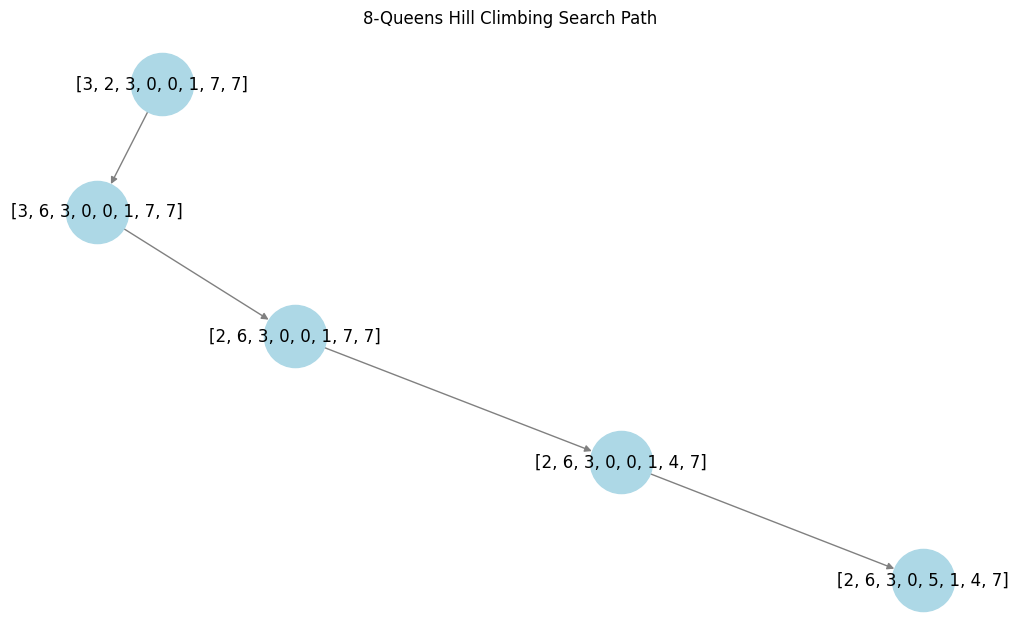

In [1]:
import random  # To create a random board
import networkx as nx  # To draw the graph
import matplotlib.pyplot as plt  # To show the graph

# Function to count how many queens attack each other
def count_attacks(board):
    attacks = 0
    for i in range(8):
        for j in range(i + 1, 8):
            # If two queens are in the same row or diagonal, count as an attack
            if board[i] == board[j] or abs(board[i] - board[j]) == abs(i - j):
                attacks += 1
    return attacks

# Function to find the best move
def best_move(board):
    best_board = board[:]
    min_attacks = count_attacks(board)

    for col in range(8):  # Try moving each queen
        for row in range(8):  # Move to each row in the column
            if board[col] == row:  # Skip if the queen is already there
                continue

            new_board = board[:]
            new_board[col] = row  # Move queen to a new row
            new_attacks = count_attacks(new_board)

            if new_attacks < min_attacks:  # Keep the best move
                best_board = new_board[:]
                min_attacks = new_attacks

    return best_board, min_attacks

# Main hill climbing function
def hill_climb():
    board = [random.randint(0, 7) for _ in range(8)]  # Create a random board
    attacks = count_attacks(board)

    print(f"Starting Board: {board} ({attacks} Attacks)")

    G = nx.DiGraph()  # Create a graph
    G.add_node(str(board))  # Add initial board as a node

    while attacks > 0:  # Keep moving queens until attacks are gone
        new_board, new_attacks = best_move(board)

        if new_attacks >= attacks:  # Stop if we cannot improve
            break

        print(f"Moving to: {new_board} ({new_attacks} Attacks)")
        G.add_node(str(new_board))
        G.add_edge(str(board), str(new_board))  # Draw an arrow in the graph

        board = new_board
        attacks = new_attacks

    print(f"Solution Found: {board} (0 Attacks)")

    return G

# Run the algorithm
G = hill_climb()

# Draw the search path graph
plt.figure(figsize=(10, 6))
nx.draw(G, nx.spring_layout(G), with_labels=True, node_color="lightblue",
        node_size=2000, edge_color="gray", arrows=True)
plt.title("8-Queens Hill Climbing Search Path")
plt.show()


## 📌 Step-by-Step Explanation

1.   Start with a Random Board
2.   We place 8 queens randomly on the chessboard.

1.   We check how many queens are attacking each other.
2.   Find the Best Move

1.   Move one queen at a time to a different row in the same column.
2.   Choose the move that reduces the number of attacks the most.
1.   Repeat Until Solved
2.   Keep moving queens until there are 0 attacks.

If no better move is found, stop (this is called getting "stuck").